In [ ]:
#Import dependencies
import torch
from PIL import Image
from torch import nn, save,load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Load data torchvision.datasets.CIFAR10()
train= datasets.CIFAR10(root="/content/gdrive/MyDrive/assignment3_DS",download=True,train=True,transform=ToTensor())
dataset=DataLoader(train,32) #creat batchs of 32 images

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/assignment3_DS/cifar-10-python.tar.gz to /content/gdrive/MyDrive/assignment3_DS


In [ ]:
#Exploring the dataset, size, shape..
x,y=train[0]

In [ ]:
train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
x.shape

torch.Size([3, 32, 32])

In [ ]:
def show_example(img, label):
    print('Label: ', train.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  frog (6)


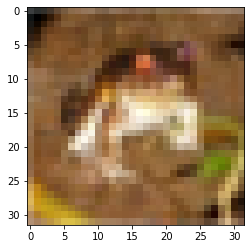

In [ ]:
show_example(x,y)

In [ ]:
dataset_32=DataLoader(train,32) #creat batchs of 32 images

In [ ]:
#Model Design
class ImageClassifierNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Conv2d(1,32,(3,3)),
        nn.ReLU(),
        nn.Conv2d(32,64,(3,3)),
        nn.ReLU(),
        nn.Conv2d(64,64,(3,3)),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(64*(28-6)*(28-6),10)
    )
  def forward(self,x):
    return self.model(x)


In [ ]:
#Instiation of the model, loss, optimization
model=ImageClassifierNN() #.to('cuda') # For gpu utilisation set .to('cuda) 
optimizer=Adam(model.parameters(), lr=1e-3) #(,learning rate) 
loss_fn=nn.CrossEntropyLoss()

In [ ]:
#Implimenting training function --> loop for epochs, and call the model for each dataset element
def train(model,epochs, dataset):
  for epoch in range(epochs):
     total_loss=0
     for batch in dataset:
       X,y=batch
       X,y=X, y
       y_pred=model(X)
       loss=loss_fn(y_pred,y)
       #Apply bachpropagation
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

       total_loss += loss
     print(f"epoch: {epoch} , loss: {total_loss}")
  with open('model_state.pt','wb') as f:
    save(model.state_dict(),f)

In [ ]:
train(model, epochs=20, dataset=dataset_32)

In [ ]:
#Read model:
with open('/content/gdrive/MyDrive/assignment3_DS/model_state.pth','rb') as f:
  model.load_state_dict(load(f))
img_tensor=train[0][0].unsqueeze(0).to('cuda')#Convert image to tensor
image_label=train[0][1]

In [ ]:

#Make prediction
img_pred= torch.argmax(model(img_tensor))